<a href="https://colab.research.google.com/github/Jesus-Vazquez-A/Insurence/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import libraries**

In [49]:
import pandas as pd # Data manipulation
import numpy as np # Linear algebra
import warnings # Ignore warnings
import seaborn as sns #plots
import matplotlib.pyplot as plt # plots

In [2]:
warnings.filterwarnings("ignore")

### **Load Data**

In [4]:
df=pd.read_csv("/content/insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Unique Values**

In [6]:
{col:list(df[col].unique()) for col in df.select_dtypes("object")}

{'region': ['southwest', 'southeast', 'northwest', 'northeast'],
 'sex': ['female', 'male'],
 'smoker': ['yes', 'no']}

In [45]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [46]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [47]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [73]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## **Data Visualization**

In [50]:
sns.set_style(style="whitegrid")

In [121]:
def histogram(feature,title):


  fig,ax=plt.subplots(1,1,figsize=(20,8))

  ax.set_title(title)
  ax.hist(df[feature],ec="k",color="#FADA5E",lw=3)


  ax.axvline(df[feature].mean(),
           color="red",
           linestyle="--",
           lw=3,label="Mean")


  ax.axvline(df[feature].median(),
           color="blue",
           linestyle="--",
           lw=3,label="Median")

  ax.legend()

  plt.show()

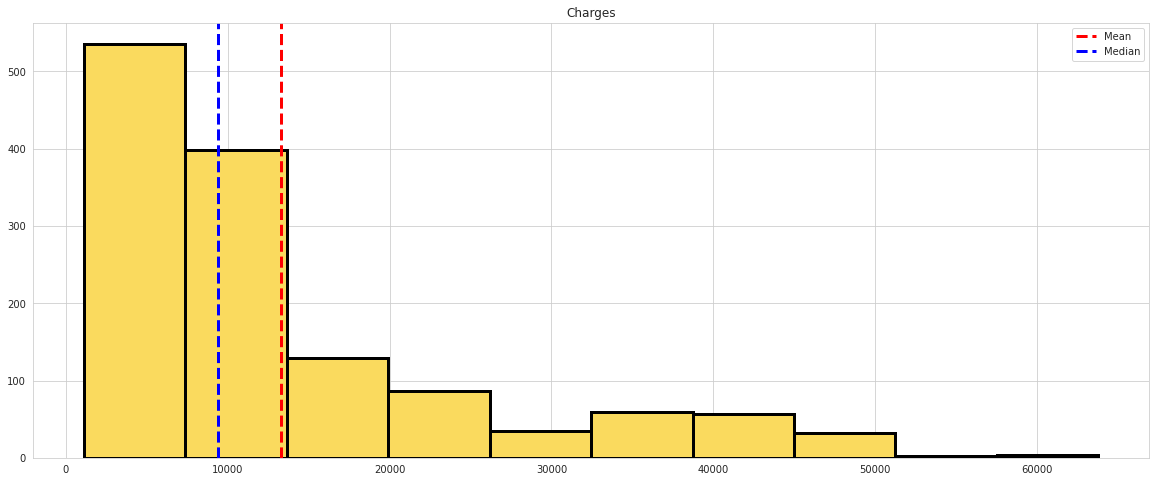

In [122]:
histogram("charges","Charges")

In [81]:
from plotnine import ggplot, aes, geom_point,geom_boxplot

### *Detection outlires*

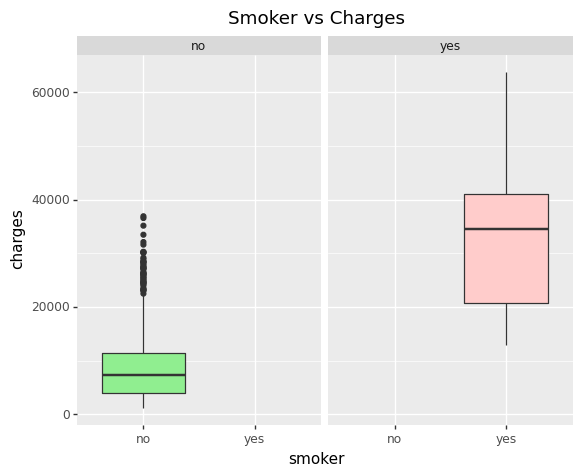

<ggplot: (8773668648113)>

In [82]:



(
    
    ggplot(df)  
    + aes(x="smoker",y="charges",fill="smoker")  
    + geom_boxplot() + labs(title="Smoker vs Charges") 
    + facet_wrap("smoker")
    + theme(legend_position="none")
    +  scale_fill_manual(values=["#90ee90","#ffcccb"])
    
  

)



We observe a strong presence of outliers, for the category of non-smokers.

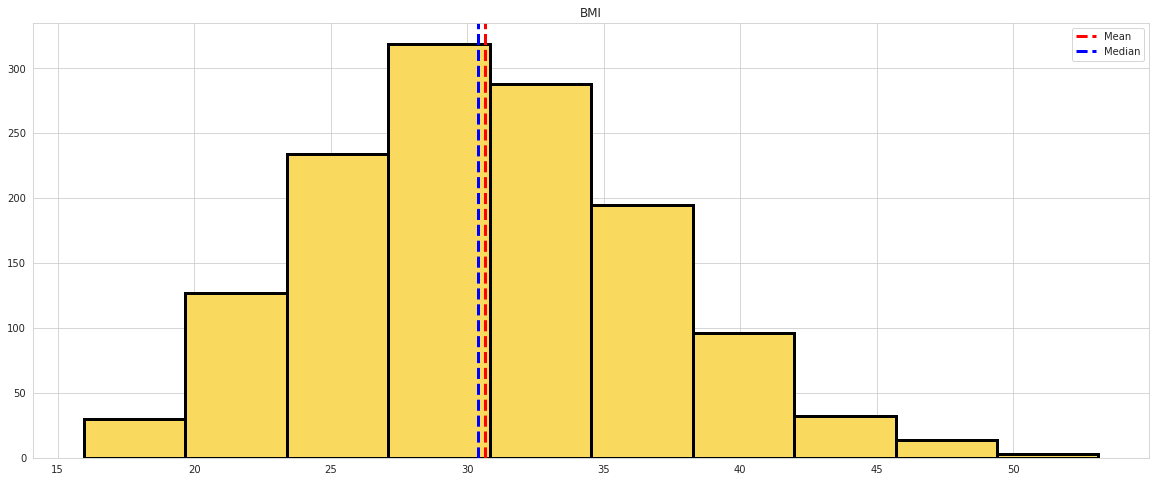

In [123]:
histogram("bmi","BMI")

Most of the BMI data is within a normal distribution. But even so, it is possible to appreciate outlier values ​​in the upper range.

In [130]:
from plotnine.facets import facet_grid

from plotnine.geoms import geom_smooth

def sactter_plots(feature,title):

  return((ggplot(df)  
    + aes(x=feature,y="charges",fill="smoker",alpha=0.1)  
    + geom_point() + labs(title=title,x=feature) 
    + facet_wrap("smoker")
    + theme(legend_position="none")
    +  scale_fill_manual(values=["#90ee90","#ffcccb"])
    + geom_smooth(method="lm")))
  

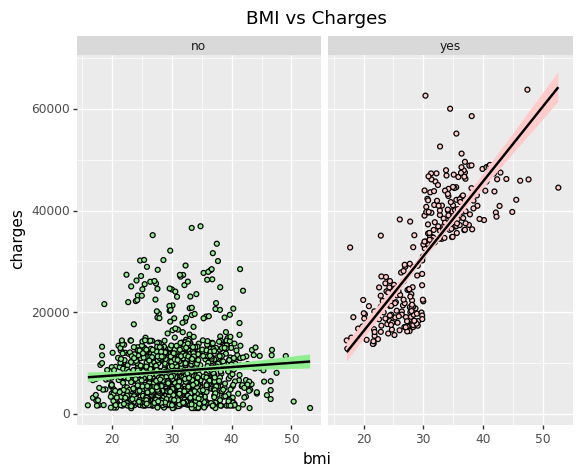

<ggplot: (8773669076133)>

In [131]:
sactter_plots("bmi","BMI vs Charges")

* For non-smokers, the data trend remains constant. 
* While for smokers the trend line is linear.

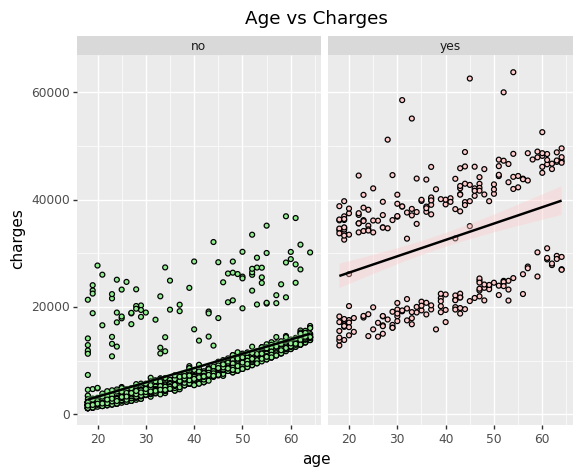

<ggplot: (8773669396241)>

In [127]:
sactter_plots("age","Age vs Charges")

* For non-smokers, the trend of the data remains linear with respect to age.

* For smokers, the relationship between age seems non-existent.